In [1]:
import pandas as pd
data = pd.read_csv('passes.csv', sep=";")

print(data.head()) 
print(data.describe())  

winning_pass_rates = data[data['winner'] == 'Yes']['passing_quote']
losing_pass_rates = data[data['winner'] == 'No']['passing_quote']
print(f"Mean passing rate for winning teams: {winning_pass_rates.mean():.2f}%")
print(f"Mean passing rate for losing teams: {losing_pass_rates.mean():.2f}%")

   game_id  passing_quote winner
0       11           72.0     No
1       11           91.0    Yes
2       12           82.0    Yes
3       12           86.0     No
4       13           82.0    Yes
          game_id  passing_quote
count  306.000000     304.000000
mean    95.000000      79.680921
std     49.138146       6.960058
min     11.000000      53.000000
25%     53.000000      75.000000
50%     95.000000      80.000000
75%    137.000000      85.000000
max    179.000000      92.000000
Mean passing rate for winning teams: 81.08%
Mean passing rate for losing teams: 78.84%


In [3]:
import pandas as pd

data = pd.read_csv('passes.csv', sep=";")

data.dropna(subset=['passing_quote', 'winner'], inplace=True)

data['passing_quote'] = pd.to_numeric(data['passing_quote'], errors='coerce')
data.dropna(subset=['passing_quote'], inplace=True)  

Q1 = data['passing_quote'].quantile(0.25)
Q3 = data['passing_quote'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['passing_quote'] < (Q1 - 1.5 * IQR)) | (data['passing_quote'] > (Q3 + 1.5 * IQR))]
data = data[~data.isin(outliers)].dropna()  

print(data.describe())



          game_id  passing_quote
count  301.000000     301.000000
mean    94.946844      79.913621
std     49.022347       6.584769
min     11.000000      60.000000
25%     53.000000      75.000000
50%     95.000000      80.000000
75%    136.000000      85.000000
max    179.000000      92.000000


In [5]:
summary_stats = data['passing_quote'].describe()
summary_stats['mode'] = data['passing_quote'].mode()[0] ss
print("\nSummary Statistics after cleaning:")
print(summary_stats)


Summary Statistics after cleaning:
count    301.000000
mean      79.913621
std        6.584769
min       60.000000
25%       75.000000
50%       80.000000
75%       85.000000
max       92.000000
mode      82.000000
Name: passing_quote, dtype: float64


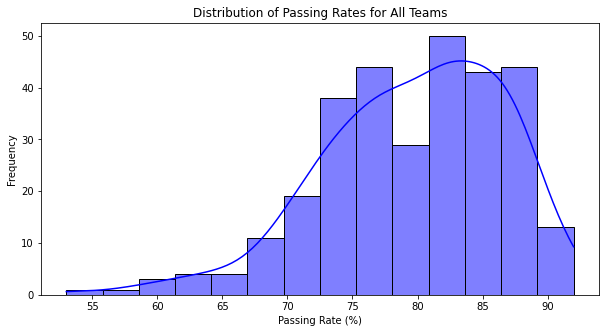

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('passes.csv', sep=";")

data.dropna(subset=['passing_quote', 'winner'], inplace=True)
data['passing_quote'] = pd.to_numeric(data['passing_quote'], errors='coerce')

winning_rates = data[data['winner'] == 'Yes']['passing_quote']
losing_rates = data[data['winner'] == 'No']['passing_quote']

plt.figure(figsize=(10, 5))
sns.histplot(data['passing_quote'], kde=True, color='blue')
plt.title('Distribution of Passing Rates for All Teams')
plt.xlabel('Passing Rate (%)')
plt.ylabel('Frequency')
plt.show()

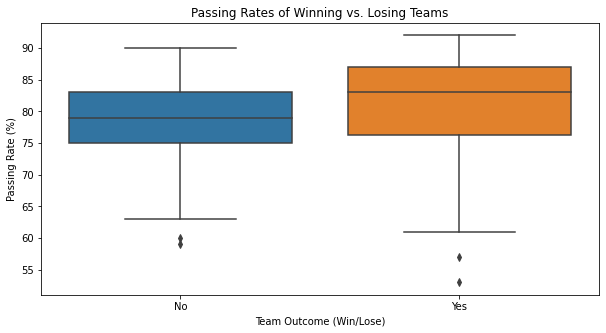

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='winner', y='passing_quote', data=data)
plt.title('Passing Rates of Winning vs. Losing Teams')
plt.xlabel('Team Outcome (Win/Lose)')
plt.ylabel('Passing Rate (%)')
plt.show()

In [8]:
print("Descriptive Statistics for All Teams:")
print(data['passing_quote'].describe())
print("\nDescriptive Statistics for Winning Teams:")
print(winning_rates.describe())
print("\nDescriptive Statistics for Losing Teams:")
print(losing_rates.describe())

Descriptive Statistics for All Teams:
count    304.000000
mean      79.680921
std        6.960058
min       53.000000
25%       75.000000
50%       80.000000
75%       85.000000
max       92.000000
Name: passing_quote, dtype: float64

Descriptive Statistics for Winning Teams:
count    114.000000
mean      81.078947
std        8.064063
min       53.000000
25%       76.250000
50%       83.000000
75%       87.000000
max       92.000000
Name: passing_quote, dtype: float64

Descriptive Statistics for Losing Teams:
count    190.000000
mean      78.842105
std        6.074173
min       59.000000
25%       75.000000
50%       79.000000
75%       83.000000
max       90.000000
Name: passing_quote, dtype: float64


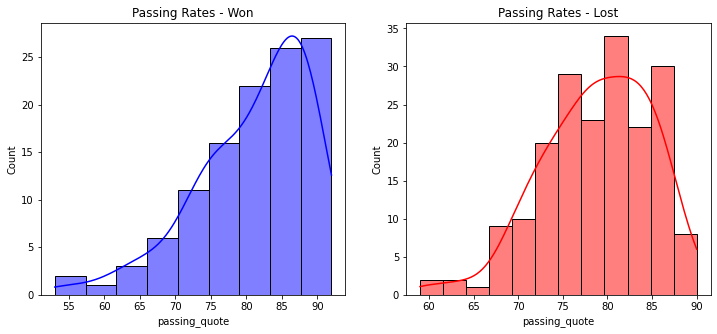

Variance of Won Data: 65.02911038658594
Variance of Lost Data: 36.895572263993294
Number of draw entries: 0
Number of decisive game entries: 152
Welch’s t-test results for Hypothesis 1: T-Statistic = 2.558073778223821, P-value = 0.011305613612228455
Insufficient data for Levene's test for Hypothesis 2.


In [14]:
import pandas as pd
from scipy import stats
data = pd.read_csv('passes.csv', sep=";")
data.dropna(subset=['passing_quote', 'winner'], inplace=True)
winning_rates = data[data['winner'] == 'Yes']['passing_quote']
losing_rates = data[data['winner'] == 'No']['passing_quote']
draw_rates= data[data['winner'] == 'Draw']['passing_quote']

data['diff'] = data.groupby('game_id')['passing_quote'].transform(lambda x: x.diff().abs())
data.dropna(subset=['diff'], inplace=True)

draw_diffs = data[data['winner'] == 'Draw']['diff']
win_diffs = data[data['winner'].isin(['Yes', 'No'])]['diff']

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(winning_rates, kde=True, color='blue')
plt.title('Passing Rates - Won')
plt.subplot(122)
sns.histplot(losing_rates, kde=True, color='red')
plt.title('Passing Rates - Lost')
plt.show()

print("Variance of Won Data:", winning_rates.var())
print("Variance of Lost Data:", losing_rates.var())

print(f"Number of draw entries: {len(draw_diffs)}")
print(f"Number of decisive game entries: {len(win_diffs)}")

t_statistic, p_value = stats.ttest_ind(winning_rates, losing_rates, equal_var=False)
print(f"Welch’s t-test results for Hypothesis 1: T-Statistic = {t_statistic}, P-value = {p_value}")

if len(draw_diffs) > 0:
    stat, p_val = stats.levene(draw_diffs, win_diffs)
    print(f"Levene’s test results for Hypothesis 2: Statistic = {stat}, P-value = {p_val}")
else:
    print("Insufficient data for Levene's test for Hypothesis 2.")